# **Load the Dataset**

In [ ]:
## Machine Learning - Linear Regression
#
# X refers to the population size in 10,000s
# Y refers to the profit in $10,000s


#Write the code below every comment
import numpy as np
from google.colab import drive, files
drive.mount('/content/drive/')
path = "/content/drive/My Drive/ex2data1.txt"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Task1: Optimization Funcation**

Optimization terminated successfully.
         Current function value: 4.476971
         Iterations: 6
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 4.476971
         Iterations: 90
         Function evaluations: 172


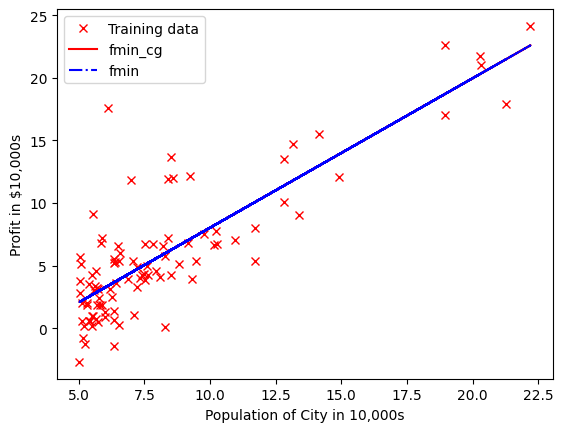

In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.optimize import fmin_cg, fmin

# Read comma separated data
data = np.loadtxt(os.path.join('Data', path), delimiter=',')  # Replace 'your_data_file.csv' with your actual data file
X, Y = data[:, 0], data[:, 1]

# Add a column of ones to X for the bias term
X = np.c_[np.ones_like(X), X]

args = (X,Y)  # parameter values
m=len(X)
al=1
lr2=[]

def J(t, x, y):
    theta = t
    # Calculate the cost function (mean squared error)
    J = np.sum((np.dot(x, theta) - y) ** 2) / (2 * len(x))
    lr2.append(J)
    return J

def gradf(t, x, y):
    theta = t
    gradient = np.dot(x.T, (np.dot(x, theta) - y)) / len(x)
    return gradient

args = (X, Y)
x0 = [0, 0]  # Initial guess

res1 = fmin_cg(J, x0, fprime=gradf, args=args)
lr1=list(lr2)

lr2=[]
res2 = fmin(J, x0, args=args)

# Plotting the result
plt.plot(X[:, 1], Y, 'rx', X[:, 1], np.dot(X, res1), 'r', X[:, 1], np.dot(X, res2), 'b-.')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend(['Training data', 'fmin_cg', 'fmin'])
plt.show()


# **Learning** rates

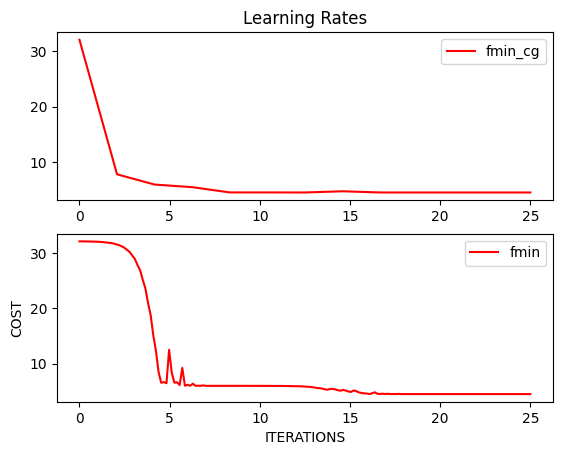

In [ ]:
# plot learning rates of fmin and fmin_cg
xx = np.linspace(0,25,len(lr1))
xy = np.linspace(0,25,len(lr2))
plt.subplot(2,1,1)

plt.title("Learning Rates")

plt.plot( xx,lr1,'r',label='fmin_cg') # (lr1) learning rate 1 of fmin
plt.legend()
plt.subplot(2,1,2)
plt.plot( xy,lr2,'r',label='fmin')  # (lr2)  learning rate 1 of fmin_cg
plt.ylabel('COST'); # Set the y  axis label
plt.xlabel('ITERATIONS'); # Set the x  axis label
plt.legend()
plt.show()

# **Task2: Fitting second Order Polynomial through dataset.**

With theta = [0, 0, 0] 
Cost computed = 32.072733877455676
With theta = [0.01543341 0.0874023  0.05184844]
Cost computed = 5.456329566881363


<function matplotlib.pyplot.show(close=None, block=None)>

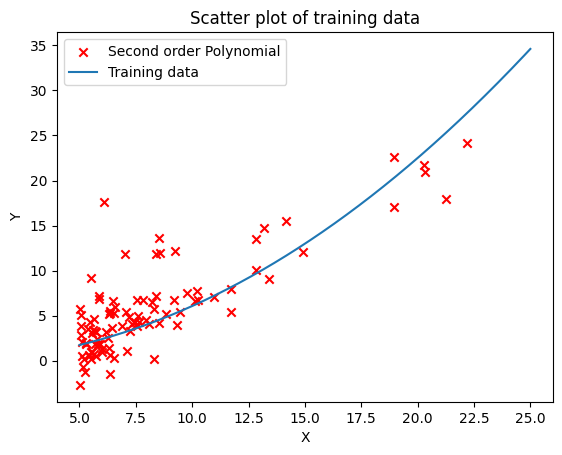

In [ ]:
from numpy import *
import matplotlib.pyplot as plt

# used for manipulating directory paths
import os

# Assuming you have loaded your data here, replace it with your actual data loading code
data = np.loadtxt(os.path.join('Data', path), delimiter=',')

def plotdata(a,b):                       # function def
  # plotting points as a scatter plot
  plt.scatter(a, b, marker='x', color='r')
  plt.title('Scatter plot of training data')
  plt.xlabel('X')
  plt.ylabel('Y')

def computeCostVectorize(X,y , theta):
  m = y.size
  J = 0    # You need to return this parameter correctly
  h = np.dot(X, theta)
  J = np.sum((h - y) ** 2) / (2 * m)
  return J

## ======================= Vectorize Gradient Descent =======================

def gradientDescentVectorize(X, y, theta, alpha, num_iters):
  m = y.shape[0]
  theta = theta.copy()
  J_history = []

  for i in range(num_iters):
    h = np.dot(X, theta)
    theta = theta - (alpha / m) * np.dot(X.T, (h - y))
    J_history.append(computeCostVectorize(X, y, theta))
  return theta, J_history

X, Y = data[:, 0], data[:, 1]
m=len(data)
X=np.stack([np.ones(m),X, np.power(X,2)],axis=1)

cost= computeCostVectorize(X, Y, theta=np.array([0.0, 0.0,0.0]))
print('With theta = [0, 0, 0] \nCost computed =', cost)

theta_2 = np.zeros(3)

# some gradient descent settings
iterations = 1500
alpha = 0.00001

theta_2, J_history = gradientDescentVectorize(X ,Y, theta_2, alpha, iterations)
cost= computeCostVectorize(X, Y, theta_2)
print(f'With theta = {theta_2}\nCost computed = {cost}')
# plot the 2nd Order fit
plotdata(X[:, 1],Y)
p = np.linspace(5, 25, 1000)
p=np.stack([np.ones(1000),p, np.power(p,2)],axis=1)

plt.plot(p[:, 1], np.dot(p, theta_2))
plt.legend([ 'Second order Polynomial','Training data',]);
plt.show

# **Task3: Fitting third Order Polynomial through same dataset**

The cost is 32.072733877455676
With theta = [0.00040239 0.00283086 0.016799   0.00194862]
Cost computed = 9.029074252509437


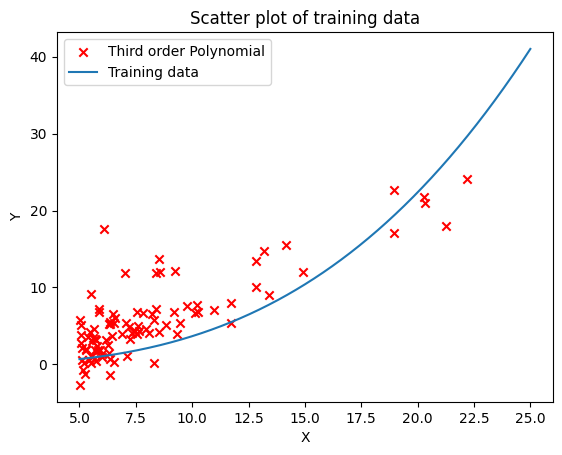

In [ ]:
X, Y = data[:, 0], data[:, 1]
m=len(data)

X=np.stack([np.ones(m),X, np.power(X,2),np.power(X,3)],axis=1)

cost= computeCostVectorize(X, Y, theta=np.array([0.0, 0.0,0.0,0.0]))
print("The cost is",cost )

theta_3 = np.zeros(4)

# some gradient descent settings
iterations = 1500
alpha = 0.0000001

theta_3, J_history = gradientDescentVectorize(X ,Y, theta_3, alpha, iterations)
cost= computeCostVectorize(X, Y, theta_3)
print(f'With theta = {theta_3}\nCost computed = {cost}')
# plot the 3rd order polynomial fit
plotdata(X[:, 1],Y)

p = np.linspace(5, 25, 1000)
p=np.stack([np.ones(1000),p, np.power(p,2),np.power(p,3)],axis=1)

plt.plot(p[:, 1], np.dot(p, theta_3))

plt.legend([ 'Third order Polynomial','Training data',]);